<a href="https://colab.research.google.com/github/cyberinnovator/CBT-CIP/blob/main/Updated_Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
data = pd.ExcelFile('/UnemploymentIndia.xlsx')

# Display sheet names
print(data.sheet_names)


['Unemployment in India']


In [ ]:
!pip install openpyxl


In [ ]:

# Load the sheet into a DataFrame
unemployment_data = data.parse('Unemployment in India')

# Display the first few rows of the data to understand its structure
unemployment_data.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:

# Check for missing values and data types
unemployment_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [ ]:

# Convert 'Date' column to datetime format for proper time series analysis
unemployment_data['Date'] = pd.to_datetime(unemployment_data['Date'], format='%d-%m-%Y')

# Handle missing values if any (e.g., drop or fill)
unemployment_data.dropna(inplace=True)

# Display summary statistics
unemployment_data.describe()


,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


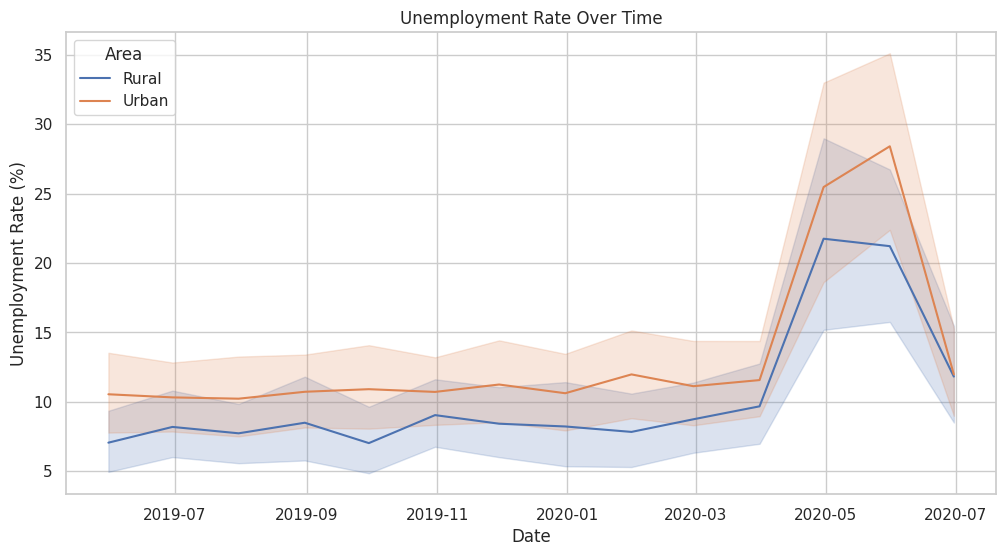

In [ ]:


# Set plot style
sns.set(style='whitegrid')

# Plot overall unemployment rate trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=unemployment_data, x='Date', y='Estimated Unemployment Rate (%)', hue='Area')
plt.title('Unemployment Rate Over Time')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.legend(title='Area')
plt.show()


<ipython-input-14-de7182f9eb24>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data.values, y=region_data.index, palette='viridis')


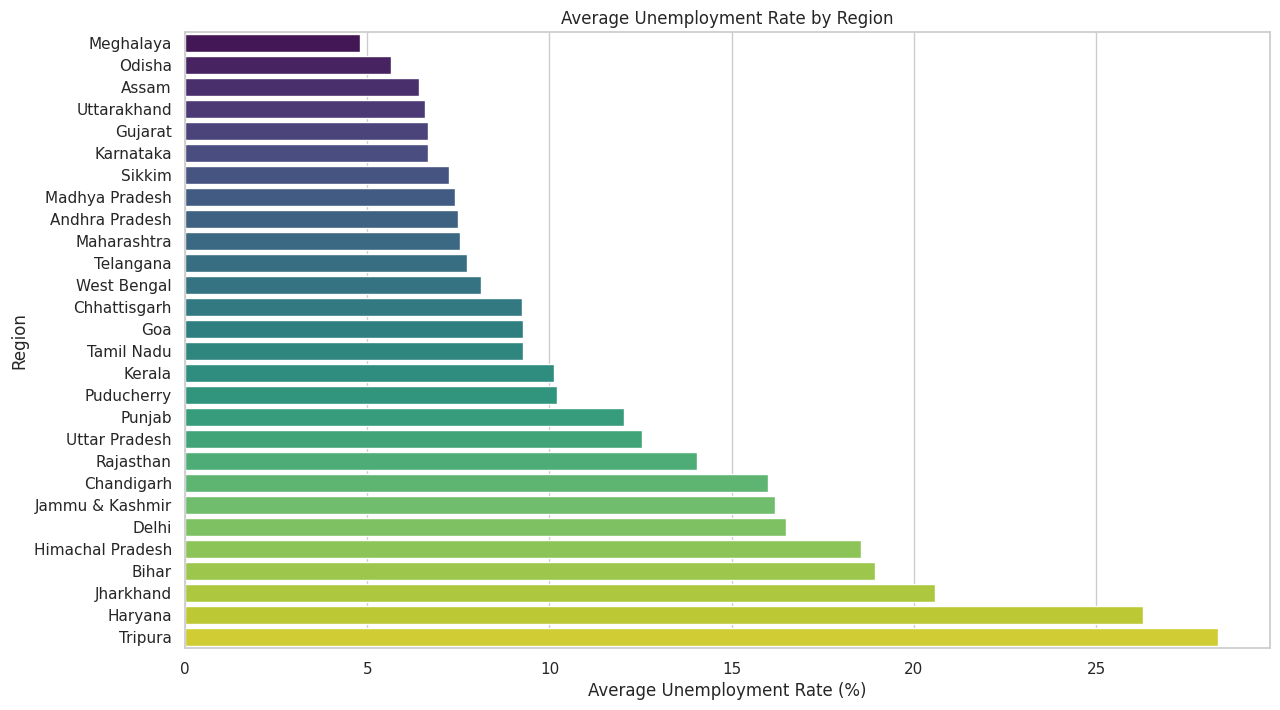

In [ ]:

# Analyze unemployment rate by region
plt.figure(figsize=(14, 8))
region_data = unemployment_data.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()
sns.barplot(x=region_data.values, y=region_data.index, palette='viridis')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Region')
plt.show()


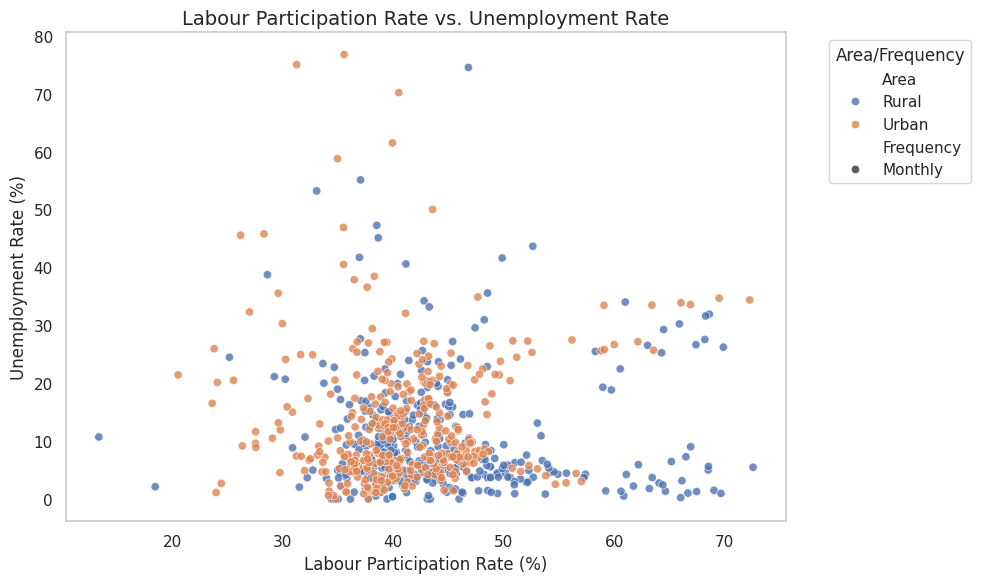

In [ ]:

# Graph 2: Labour Participation Rate vs. Unemployment Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=unemployment_data,
    x='Estimated Labour Participation Rate (%)',
    y='Estimated Unemployment Rate (%)',
    hue='Area',
    style='Frequency',
    alpha=0.8
)

plt.title('Labour Participation Rate vs. Unemployment Rate', fontsize=14)
plt.xlabel('Labour Participation Rate (%)', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.legend(title='Area/Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()
